# Support Vector Machines (SVM)

### Question 1:  
### Max Margin Classifier in 1D
**Let's assume two classes in 1D dimension. Class 1 : 9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14<br> <br>a) Plot these points. <br><br>b) Are they linearly separable?<br><br>c) Assume a threshold t. Points to one side of the threshold belong to class -1 and points to the other side of the threshold belong to class 1. Find the range of values of t which classifies the two classes completely. <br><br>d) Let's say y_i is the label and can take values -1 or 1. Max margin classifiers aims to find a supporting hyperplane (a boundary between the two classes) such the distance (or margin) from points belonging to either class is maximised. The points closest to the boundary on either side are termed as support vectors. Maximising the perpendicular distance from the support vectors to line will achieve the goal of max margin classifier. Our objective/cost function for the 1D case is cost = max{min(y_i(t-x_i))} where t is the threhold, y_i is the label and x_i is the data point. Plot the cost as a function of the threshold for the range of values of t found in the (c) part. <br><br>e) For what t is the cost maximum? This is the threshold that optimally classifies the two datasets. Now plot the threshold, and the two classes on a graph. Assign appropriate colours to distinguish the two classes and the threshold.<br><br>f) What are the support vectors?<br><br>g) Comment on the threshold. Is it the mid point of the two support vectors in this linearly separable 1D case?**

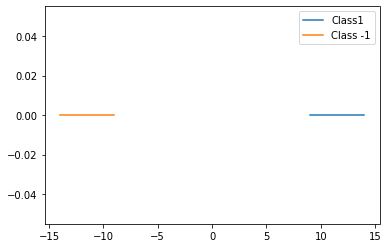

In [74]:
import numpy as np
import matplotlib.pyplot as plt
arr1 = np.array([9,10,11,12,13,14])
arr2 = np.array([-9,-10,-11,-12,-13,-14])
arr3  = np.zeros(6)
plt.plot(arr1,arr3, label = 'Class1')
plt.plot(arr2,arr3, label = 'Class -1')
plt.legend()

Yes, they are linearly separable

The range of t can be (-9, 9)

In [75]:
t = np.linspace(-9,9, num = 100)

In [76]:
cost = []
for j in t:
    l1 = min(arr1 - j)
    l2 = min(-1*(arr2 - j))
    l3 = min(l1,l2)
    cost.append(l3)

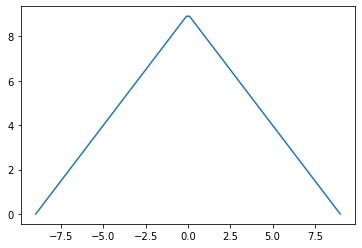

In [77]:
plt.plot(t,cost)

In [78]:
t[cost.index(max(cost))]

-0.09090909090908994

Write your final answer here.

### Question 2
### Outliers and Slack Parameter
**a) Class 1 : -6,9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14 Repeat all parts of Q1. Does the boundary shift? Is this more optimal than the classifier in Q1? You will see that there is an outlier. Will it be better to ignore the outlier so that the classifier generalizes better? <br><br> b) Class 1 : -10,9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14. Is this data linearly separable? Is there an outlier? Ignore the outlier and then report the threhold.<br><br>c) In the above cases, we allow for some error so that our data generalises better. How much of this error is permissible is captured by a slack parameter.** 

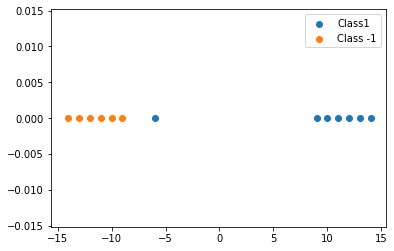

In [79]:
arr1 = np.array([ -6,9,10,11,12,13,14])
arr2 = np.array([-9,-10,-11,-12,-13,-14])
plt.scatter(arr1,np.zeros(len(arr1)), label = 'Class1')
plt.scatter(arr2,np.zeros(len(arr2)), label = 'Class -1')
plt.legend()

In [80]:
t = np.linspace(-9,9, num = 100)
cost = []
for j in t:
    l1 = min(arr1 - j)
    l2 = min(-1*(arr2 - j))
    l3 = min(l1,l2)
    cost.append(l3)
plt.plot(t,cost)a

SyntaxError: invalid syntax (<ipython-input-80-25687b82f749>, line 8)

In [81]:
t[cost.index(max(cost))]

-0.09090909090908994

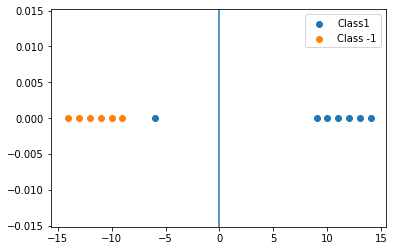

In [82]:
plt.scatter(arr1,np.zeros(len(arr1)), label = 'Class1')
plt.scatter(arr2,np.zeros(len(arr2)), label = 'Class -1')
plt.axvline(x = t[cost.index(max(cost))])
plt.legend()

Yes, the boundary shifts to some extent and if point is ignored it will generalize better

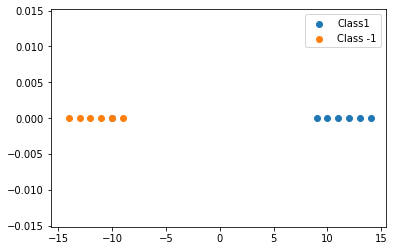

In [83]:
arr1 = np.array([ -10,9,10,11,12,13,14])
arr2 = np.array([-9,-10,-11,-12,-13,-14])
plt.scatter(arr1,np.zeros(len(arr1)), label = 'Class1')
plt.scatter(arr2,np.zeros(len(arr2)), label = 'Class -1')
plt.legend()

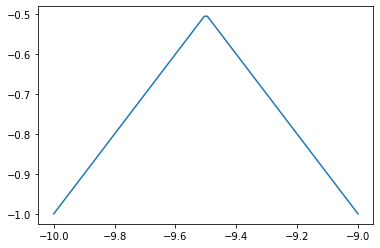

In [84]:
t = np.linspace(-10,-9, num = 100)
cost = []
for j in t:
    l1 = min(arr1 - j)
    l2 = min(-1*(arr2 - j))
    l3 = min(l1,l2)
    cost.append(l3)
plt.plot(t,cost)

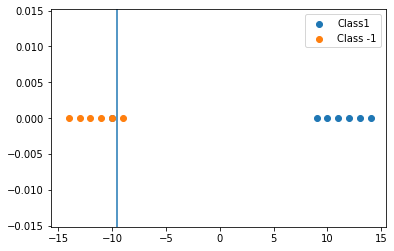

In [85]:
plt.scatter(arr1,np.zeros(len(arr1)), label = 'Class1')
plt.scatter(arr2,np.zeros(len(arr2)), label = 'Class -1')
plt.axvline(x = t[cost.index(max(cost))])
plt.legend()

### Question 3 : 
### SVM in 2D
**Using sklearn, visualise the data points and plot the decision boundary for the following 2D datapoints, into 2 classes. Also mention the support vectors for each case. Use sklearn's SVC implementation with 'linear' kernel and default C. <br> <br>
(a)  Class 1 - (-1,-2), (1,1), (1.5, 1.5), (-2,-1), (0,0), (1,-0.5) <br> Class 2 - (4.1,5.2), (6,8), (4,4), (7,8), (4.5,6), (5.5,6)**


In [86]:
class0 = np.array([[-1,-2], [1,1], [1.5, 1.5], [-2,-1], [0,0], [1,-0.5]] )
class1 = np.array( [[4.1,5.2], [6,8], [4,4], [7,8], [4.5,6], [5.5,6]])
data = np.append(class0, class1)

In [87]:
data = data.reshape(12,2)

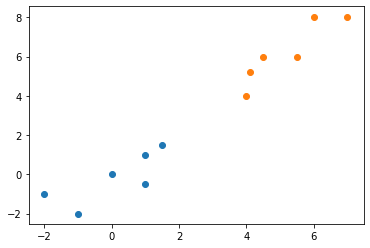

In [88]:
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])

In [89]:
labels = np.array([])
for i in range(len(class0)):
    labels = np.append(labels, 0)
for i in range(len(class1)):
    labels = np.append(labels, 1)

In [90]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(data, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
clf.intercept_

array([-2.2])

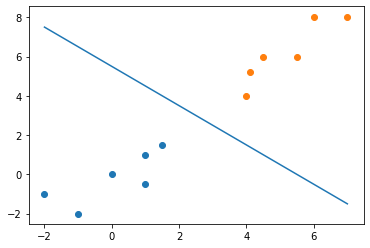

In [92]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return -1*x+5.5
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])
graph(my_formula, range(-2,8))

**(b) Now add the point (3.4,2.3) to Class 0 from part (a), and classify into Class0 and Class1 again.**

In [93]:
class0 = np.array([[-1,-2], [1,1], [1.5, 1.5], [-2,-1], [0,0], [1,-0.5], [3.4,2.3]] )
class1 = np.array( [[4.1,5.2], [6,8], [4,4], [7,8], [4.5,6], [5.5,6]])
data = np.append(class0, class1)
data = data.reshape(13,2)
labels = np.array([])
for i in range(len(class0)):
    labels = np.append(labels, 0)
for i in range(len(class1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(data, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
clf.intercept_

array([-4.66153616])

In [95]:
clf.coef_

array([[0.3692306 , 1.04615335]])

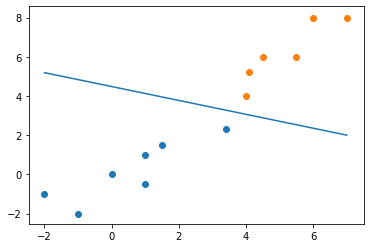

In [96]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return -0.354*x+4.481
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])
graph(my_formula, range(-2,8))

**c) Now add the point (4.5,4.5) to Class0 in part (a) and classify into classes 0 and 1 again. <br>  Comment on whether it is possible to perfectly classify these points using a linear classifier in 2D.**

In [97]:
class0 = np.array([[-1,-2], [1,1], [1.5, 1.5], [-2,-1], [0,0], [1,-0.5], [3.4,2.3],[4.5,4.5]] )
class1 = np.array( [[4.1,5.2], [6,8], [4,4], [7,8], [4.5,6], [5.5,6]])
data = np.append(class0, class1)
data = data.reshape(14,2)
labels = np.array([])
for i in range(len(class0)):
    labels = np.append(labels, 0)
for i in range(len(class1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(data, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
clf.coef_

array([[-0.2011238 ,  0.73820142]])

In [99]:
clf.intercept_

array([-2.01404164])

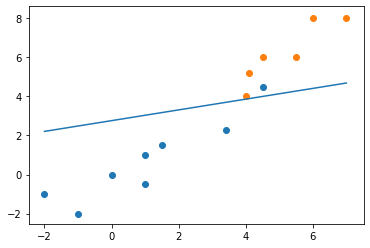

In [100]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return 0.275*x+2.758
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])
graph(my_formula, range(-2,8))

No we can't classify using 2d classifier

### Change of support vectors
**(d) How did the addition of one point in (b) and (c) affect the separating plane in (a)?**

The linear curve doesn't seem to be the right fit here as there is an outlier present in class1. We need to use some other classifier

**(e) Now add the point (-1.3,-1.9) to part (a) and classify again. This time, did the decision boundary change?**


In [101]:
class0 = np.array([[-1,-2], [1,1], [1.5, 1.5], [-2,-1], [0,0], [1,-0.5], [3.4,2.3],[4.5,4.5],[-1.3,-1.9]] )
class1 = np.array( [[4.1,5.2], [6,8], [4,4], [7,8], [4.5,6], [5.5,6]])
data = np.append(class0, class1)
data = data.reshape(15,2)
labels = np.array([])
for i in range(len(class0)):
    labels = np.append(labels, 0)
for i in range(len(class1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(data, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [102]:
clf.coef_

array([[-0.2011238 ,  0.73820142]])

In [103]:
clf.intercept_

array([-2.01404163])

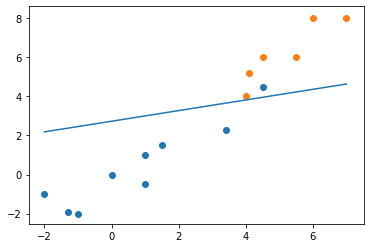

In [104]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return 0.272*x+2.728
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])
graph(my_formula, range(-2,8))

Almost no change in decison boundary

### Perturbation of non-support vectors
**(f) Now perturb all the points in both classes in part (a) except (1.5,1.5) in class0 and (4,4) in class1 as follows. Add -0.5 to each x and y coordinate in Class0 and 0.5 to each point in Class1. Did the decision boundary change?**

In [105]:
import numpy as np
class0 =np.array([[-1.5,-2.5], [0.5,0.5], [1.5, 1.5], [-2.5,-1.5], [-0.5,-0.5], [0.5,-1],[-1.8,-2.4]])
class1 = np.array([[4.6,5.7], [6.5,8.5], [4,4], [7.5,8.5], [5,6.5], [6,6.5]])
data = np.append(class0, class1)
data = data.reshape(13,2)
labels = np.array([])
for i in range(len(class0)):
    labels = np.append(labels, 0)
for i in range(len(class1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(data, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
clf.coef_

array([[0.4, 0.4]])

In [107]:
clf.intercept_

array([-2.2])

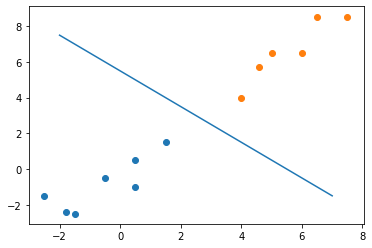

In [108]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return -1*x+5.5
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])
graph(my_formula, range(-2,8))

**(g) How did the perturbation of points which are not support vectors in (a) affect the final classifier? Did the decision boundary change? Why not?**

Support vectors still remain unchanged which makes even the decision boundary unchaged.

### Question 4  
### Introduction of Kernels
**a) Plot two concentric circles of radii 4 and 8 with origin at 0. Sample 100 points uniformly from each of these circles. (use rcos(theta) and rsin(theta) to find the coordinates of the points lying on the circle. r is the radius of the circle. Vary theta from 3.6 degrees to 360 degrees in intervals of 3.6 degrees.)<br><br>b) Is the data linearly separable? <br><br>c)Since it's not, we will transform them to a different space (with probably different number of dimensions). The transformation (which generally boils down to inner product - something that we call a kernel) will make the data linearly separable in the different space. For each point, compute features as [1, x, x^2,xy,y^2,y]. This transforms the data from 2D to 6D. Now, use sklearn's SVM classifier (linear kernel) to classify the transformed feature space into two classes. <br><br>d)Now apply SVM classifier with i) polynomial kernel with degree 2  ii) rbf kernel and perform the classification. Visualize the decision boundary in the original 2D space in both the cases. Report the accuracies. Which performs best and why?<br>**

**Answerb) The data is not linearly seperable.
d) The polynomial kernel with degree 2 performs better as it spilts the two datasets with equation of circle which has raidus somehwere btewwen 4 and 8**

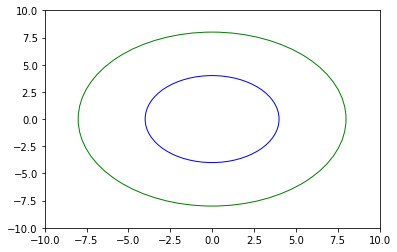

In [40]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 4, color='b', fill=False)
circle2 = plt.Circle((0, 0), 8, color='g', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))

ax.add_artist(circle1)
ax.add_artist(circle2)

In [46]:
import math 
import numpy as np 
import matplotlib.pyplot as plt  
  
in_array = np.linspace(0, 2 * np.pi, 100) 
  
circle1_array_cos = []
circle1_array_sin = []
  
for i in range(len(in_array)): 
    circle1_array_cos.append(4*math.cos(in_array[i]))
    circle1_array_sin.append(4*math.sin(in_array[i])) 
    i += 1
  
   
print("cos_array : ", circle1_array_cos)  
print("\nsin_array : ", circle1_array_sin)  

cos_array :  [4.0, 3.9919467058875377, 3.9678192513231814, 3.927714789050827, 3.871794805585425, 3.8002844709637817, 3.7134717320642903, 3.6117061531464847, 3.4953975082791398, 3.365014131324725, 3.2210810301242345, 3.064177772475912, 2.8949361524202804, 2.7140376462285287, 2.52221066833809, 2.3202276382847926, 2.1089018704420095, 1.8890842990907308, 1.6616600520075457, 1.4275448863674876, 1.1876815013130997, 0.9430357420377091, 0.6945927106677217, 0.4433527996040444, 0.19032766329496872, -0.06346385533923211, -0.31699982742715416, -0.5692593530931409, -0.819226672260763, -1.0658952547601401, -1.3082718532696866, -1.5453805027725147, -1.7762664504230965, -2.000000000000001, -2.215680255464441, -2.4224387485506673, -2.61944293578114, -2.8058995508252855, -2.9810577987030187, -3.14421237897115, -3.2947063257193308, -3.4319336529399083, -3.5553417946196935, -3.6644338297282784, -3.7587704831436333, -3.8379718944579895, -3.901719147541628, -3.949755554705577, -3.9818876902923384, -3.997986

In [53]:
circle1_array_cos = np.array(circle1_array_cos)
circle1_array_sin = np.array(circle1_array_sin)
circle2_array_cos = 2*circle1_array_cos
circle2_array_sin = 2*circle1_array_sin

In [78]:
circle1_array_cos = circle1_array_cos.reshape(100,1)
circle1_array_sin = circle1_array_sin.reshape(100,1)
circle2_array_cos = circle2_array_cos.reshape(100,1)
circle2_array_sin = circle2_array_sin.reshape(100,1)

In [79]:
circle1_array = np.hstack((circle1_array_cos,circle1_array_sin))
circle2_array = np.hstack((circle2_array_cos,circle2_array_sin))

In [80]:
circle2_array.shape

(100, 2)

In [83]:
data = np.append(circle1_array, circle2_array)
data = data.reshape(200,2)
labels = np.array([])
for i in range(len(circle1_array)):
    labels = np.append(labels, 1)
for i in range(len(circle2_array)):
    labels = np.append(labels, 2)
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(data, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [84]:
clf.coef_

array([[ 0.16665751, -0.00352995]])

In [85]:
clf.intercept_

array([-0.33347908])

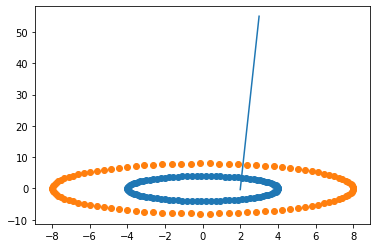

In [103]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return 55.33*x-111
plt.scatter(circle1_array[:,0],circle1_array[:,1])
plt.scatter(circle2_array[:,0],circle2_array[:,1])
graph(my_formula, range(2,4))

In [111]:
circle1_x2 = np.square(circle1_array_cos)
circle1_y2 = np.square(circle1_array_sin)
circle1_xy = np.multiply(circle1_array_cos, circle1_array_sin)
circle1_1  = np.ones((100,1))
circle1_array_new = np.hstack((circle1_1,circle1_array_cos,circle1_x2,circle1_xy,circle1_y2,circle1_array_sin))


In [113]:
circle2_x2 = np.square(circle2_array_cos)
circle2_y2 = np.square(circle2_array_sin)
circle2_xy = np.multiply(circle2_array_cos, circle2_array_sin)
circle2_1  = np.ones((100,1))
circle2_array_new = np.hstack((circle2_1,circle2_array_cos,circle2_x2,circle2_xy,circle2_y2,circle2_array_sin))

In [125]:
data = np.append(circle1_array_new, circle2_array_new)
data = data.reshape(600,2)
labels = np.array([])
for i in range(3*len(circle1_array_new)):
    labels = np.append(labels, 1)
for i in range(3*len(circle2_array_new)):
    labels = np.append(labels, 2)
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(data, labels) 

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [126]:
clf.score(data, labels)

0.87

In [130]:
data = np.append(circle1_array, circle2_array)
data = data.reshape(200,2)
labels = np.array([])
for i in range(len(circle1_array)):
    labels = np.append(labels, 1)
for i in range(len(circle2_array)):
    labels = np.append(labels, 2)
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear')
clf_linear.fit(data, labels)
clf_linear.score(data, labels)

0.545

In [131]:
data = np.append(circle1_array, circle2_array)
data = data.reshape(200,2)
labels = np.array([])
for i in range(len(circle1_array)):
    labels = np.append(labels, 1)
for i in range(len(circle2_array)):
    labels = np.append(labels, 2)
from sklearn.svm import SVC
clf_poly = SVC(kernel='poly', degree=2)
clf_poly.fit(data, labels)
clf_poly.score(data, labels)

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [134]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

In [135]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


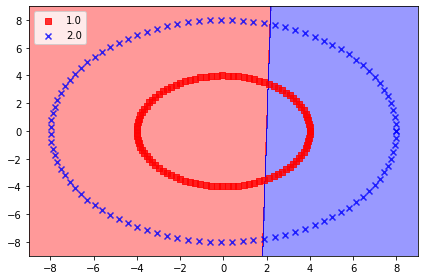

In [136]:
plot_decision_regions(data, labels, classifier=clf_linear)
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


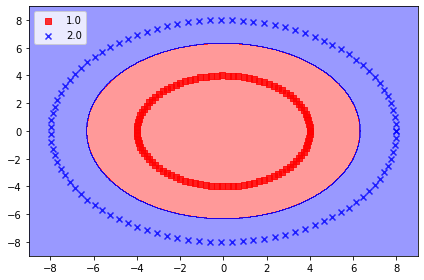

In [137]:
plot_decision_regions(data, labels, classifier=clf_poly)
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


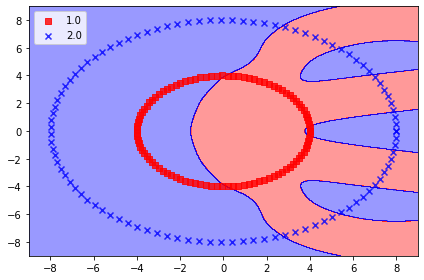

In [138]:
plot_decision_regions(data, labels, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()

### Question 5 
### Visualising effect of kernels
**Load svm_c0.txt and svm_c1.txt. Create labels as 0 and 1 for these correspondingly. Visualise the two classes and plot decision boundaries obtained by the following kernels and corresponding hyperparameters.<br>(a) Linear kernel with C as 1.0 <br>(b) RBF kernel with gamma as [0.1,1.0,10.0,50.0]** 

In [141]:
svm_c0 = np.loadtxt('svm_c0.txt')

In [142]:
svm_c1 = np.loadtxt('svm_c1.txt')

In [147]:
data = np.append(svm_c0, svm_c1)
data = data.reshape(180,2)
labels = np.array([])
for i in range(len(svm_c0)):
    labels = np.append(labels, 0)
for i in range(len(svm_c1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear', C=1.0)
clf_linear.fit(data, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


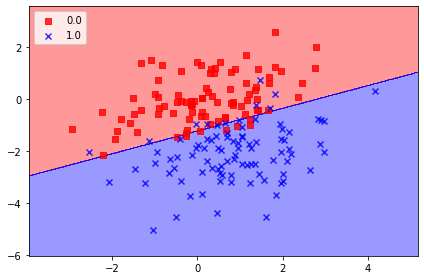

In [148]:
plot_decision_regions(data, labels, classifier=clf_linear)
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


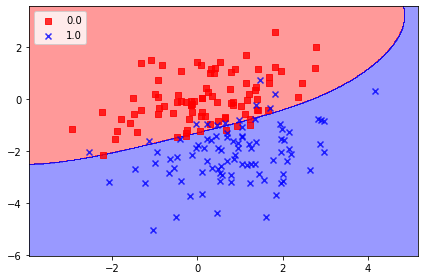

In [149]:
data = np.append(svm_c0, svm_c1)
data = data.reshape(180,2)
labels = np.array([])
for i in range(len(svm_c0)):
    labels = np.append(labels, 0)
for i in range(len(svm_c1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf_rbf1 = SVC(kernel='rbf', gamma=0.1)
clf_rbf1.fit(data, labels)
plot_decision_regions(data, labels, classifier=clf_rbf1)
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


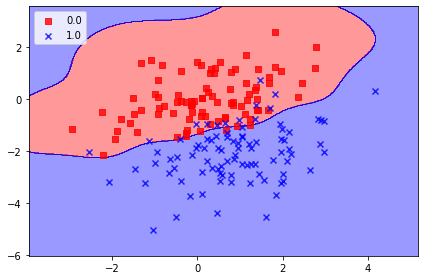

In [150]:
data = np.append(svm_c0, svm_c1)
data = data.reshape(180,2)
labels = np.array([])
for i in range(len(svm_c0)):
    labels = np.append(labels, 0)
for i in range(len(svm_c1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf_rbf2 = SVC(kernel='rbf', gamma=1)
clf_rbf2.fit(data, labels)
plot_decision_regions(data, labels, classifier=clf_rbf2)
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


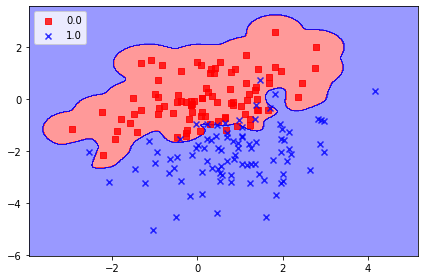

In [151]:
data = np.append(svm_c0, svm_c1)
data = data.reshape(180,2)
labels = np.array([])
for i in range(len(svm_c0)):
    labels = np.append(labels, 0)
for i in range(len(svm_c1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf_rbf3 = SVC(kernel='rbf', gamma=10)
clf_rbf3.fit(data, labels)
plot_decision_regions(data, labels, classifier=clf_rbf3)
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


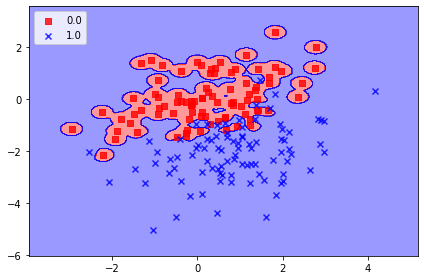

In [152]:
data = np.append(svm_c0, svm_c1)
data = data.reshape(180,2)
labels = np.array([])
for i in range(len(svm_c0)):
    labels = np.append(labels, 0)
for i in range(len(svm_c1)):
    labels = np.append(labels, 1)
from sklearn.svm import SVC
clf_rbf4 = SVC(kernel='rbf', gamma=50)
clf_rbf4.fit(data, labels)
plot_decision_regions(data, labels, classifier=clf_rbf4)
plt.legend(loc='upper left')
plt.tight_layout()

# Take Home

**Load the Forest Cover Types dataset from sklearn. 1. Use sklearn's SVM function to classify the data. Do hyperparameter tuning using <br><br> a) C = {0.001,0.01,0.1,1,10,100} <br><br> b) kernel = {'linear','poly','rbf','sigmoid'}. For the polynomial kernel, test with degrees 1,2,3,4,5. For the other kernels, test with gamma values of 0.001,0.01,0.1,1,10,100. <br><br> To do the above exercise of hyperparameter tuning, use the cross validation function in sklearn. Do not perform each experiment separately. <br><br> c) Report the accuracies (F1 scores) of the 5 best cases in a tabular form. <br><br>  d) Plot the confusion matrices of the best 5 cases.<br> e) Comment on the significance of each hyperparameter. <br><br> 2. a) Use sklearn's logistic regression, KNN and Naive Bayes to classify the above dataset. Report the F1 scores and confusion matrices in each case. <br> b) Arrange the 4 classifiers (LR, NB, SVM, KNN) in the decreasing order of F1 scores. Comment on which classifier performs best and why.**

**Answer:
c)C: Flexibility can be defined by this. A high C tries to minimize the misclassification of training data
and a low value tries to maintain a smooth classification.**<br>**Gamma: It is the hyperparamater which defines the narrowness of the gaussian transformation. Small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.** <br>
**Kernel: This defines the transformation we perform on the raw data to make it linearly separable. Depending on the data we should choose an apropriate kernel**

In [2]:
import sklearn
from sklearn.datasets import fetch_covtype

In [3]:
data = fetch_covtype().data

In [4]:
target = fetch_covtype().target

In [6]:
X = data[:1000]

In [7]:
X.shape

(1000, 54)

In [9]:
target.shape

(581012,)

In [48]:
from sklearn.preprocessing import StandardScaler

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [55]:
scaler = StandardScaler()
X_train_CV = scaler.fit_transform(X_train[0:1000,:])
y_train_CV = y_train[0:1000]
X_test_CV = scaler.fit_transform(X_test[0:1000,:])
y_test_CV = y_test[0:1000]

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid = [{'C': [0.001,0.01,0.1,1,10,100],'kernel': ['linear']},{'C': [0.001,0.01,0.1,1,10,100],'degree':[1,2,3,4,5], 'kernel': ['poly']},{'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.001,0.01,0.1,1,10,100], 'kernel': ['rbf']},{'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.001,0.01,0.1,1,10,100], 'kernel': ['sigmoid']}]
clf = GridSearchCV(estimator=SVC(), cv = 5, param_grid=grid, n_jobs=-1)
clf.fit(X_train_CV, y_train_CV)

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'degree': [1, 2, 3, 4, 5], 'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 1

In [57]:
import pandas as pd
rank = clf.cv_results_['rank_test_score']
parameters = clf.cv_results_['params']
acc = clf.cv_results_['mean_test_score']
result = pd.DataFrame({'Rank':rank,'Model Params':parameters,'Score':acc})
result = result.sort_values(by='Rank',axis=0)
result[:5][:]

,Rank,Model Params,Score
31,1,"{'C': 100, 'degree': 1, 'kernel': 'poly'}",0.693
3,1,"{'C': 1, 'kernel': 'linear'}",0.693
26,3,"{'C': 10, 'degree': 1, 'kernel': 'poly'}",0.691
102,4,"{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.687
2,5,"{'C': 0.1, 'kernel': 'linear'}",0.686


In [58]:
print('Confusion matrix for params: {C: 100, kernel: poly, degree:1}')
clf = SVC(C= 100, kernel= 'poly', degree=1)
clf.fit(X_train_CV,y_train_CV)
y_pred =clf.predict(X_test_CV)
confusion_matrix(y_test_CV,y_pred)

Confusion matrix for params: {C: 100, kernel: poly, degree:1}


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[246,  92,   0,   0,   0,   2,   5],
       [111, 376,   3,   0,   0,   4,   0],
       [  0,  19,  36,   0,   0,   9,   0],
       [  0,   0,   4,   0,   0,   2,   0],
       [  0,  19,   1,   0,   0,   0,   0],
       [  0,  14,   9,   0,   0,   8,   0],
       [ 19,   0,   0,   0,   0,   0,  21]])

In [62]:
print('Confusion matrix for params: {C: 100, kernel: sigmoid, gamma:0.001}')
clf = SVC(C= 100, kernel= 'sigmoid', gamma=0.001)
clf.fit(X_train_CV,y_train_CV)
y_pred =clf.predict(X_test_CV)
confusion_matrix(y_test_CV,y_pred)

Confusion matrix for params: {C: 100, kernel: sigmoid, gamma:0.001}


array([[242,  95,   0,   0,   0,   0,   8],
       [104, 372,  11,   0,   0,   7,   0],
       [  0,   7,  45,   0,   0,  12,   0],
       [  0,   0,   5,   0,   0,   1,   0],
       [  0,  18,   2,   0,   0,   0,   0],
       [  0,  11,   8,   0,   0,  12,   0],
       [ 21,   0,   0,   0,   0,   0,  19]])

In [60]:
print('Confusion matrix for params: {C: 10, kernel: poly, degree:1}')
clf = SVC(C= 10, kernel= 'poly', degree=1)
clf.fit(X_train_CV,y_train_CV)
y_pred =clf.predict(X_test_CV)
confusion_matrix(y_test_CV,y_pred)

Confusion matrix for params: {C: 10, kernel: poly, degree:1}


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[243,  93,   0,   0,   0,   1,   8],
       [108, 369,  10,   0,   0,   7,   0],
       [  0,  10,  42,   0,   0,  12,   0],
       [  0,   0,   5,   0,   0,   1,   0],
       [  0,  18,   2,   0,   0,   0,   0],
       [  1,  11,   7,   0,   0,  12,   0],
       [ 23,   0,   0,   0,   0,   0,  17]])

In [64]:
print('Confusion matrix for params: {C: 0.1, kernel: linear}')
clf = SVC(C= 0.1, kernel= 'linear')
clf.fit(X_train_CV,y_train_CV)
y_pred =clf.predict(X_test_CV)
confusion_matrix(y_test_CV,y_pred)

Confusion matrix for params: {C: 0.1, kernel: linear}


array([[243,  95,   0,   0,   0,   0,   7],
       [104, 372,  11,   0,   0,   7,   0],
       [  0,   7,  45,   0,   0,  12,   0],
       [  0,   0,   5,   0,   0,   1,   0],
       [  0,  18,   2,   0,   0,   0,   0],
       [  0,  11,   8,   0,   0,  12,   0],
       [ 22,   0,   0,   0,   0,   0,  18]])

In [63]:
print('Confusion matrix for params: {C: 1, kernel: linear}')
clf = SVC(C= 1, kernel= 'linear')
clf.fit(X_train_CV,y_train_CV)
y_pred =clf.predict(X_test_CV)
confusion_matrix(y_test_CV,y_pred)

Confusion matrix for params: {C: 1, kernel: linear}


array([[246,  93,   0,   0,   0,   2,   4],
       [109, 376,   5,   0,   0,   3,   1],
       [  0,  22,  33,   0,   0,   9,   0],
       [  0,   0,   5,   0,   0,   1,   0],
       [  0,  18,   2,   0,   0,   0,   0],
       [  0,  15,   9,   0,   0,   7,   0],
       [ 19,   0,   0,   0,   0,   0,  21]])

In [65]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [112]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_CV, y_train_CV)
y_pred = clf.predict(X_test_CV)
print ("Train accuracy:", clf.score(X_train_CV,y_train_CV))
print ("Test accuracy:",clf.score(X_test_CV,y_test_CV))
f1 = f1_score(y_test_CV, y_pred, average='weighted')
print(f1)
results = confusion_matrix(y_test_CV, y_pred)
print(results)

Train accuracy: 0.17
Test accuracy: 0.53
0.4035998922349983
[[ 25 317   0   0   0   0   3]
 [  1 493   0   0   0   0   0]
 [  0  59   0   0   0   5   0]
 [  0   6   0   0   0   0   0]
 [  0  20   0   0   0   0   0]
 [  0  26   0   0   0   5   0]
 [ 17  16   0   0   0   0   7]]


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train_CV, y_train_CV)
y_pred = neigh.predict(X_test_CV)
print ("Train accuracy:", clf.score(X_train_CV,y_train_CV))
print ("Test accuracy:",clf.score(X_test_CV,y_test_CV))
f1 = f1_score(y_test_CV, y_pred, average='weighted')
print(f1)
results = confusion_matrix(y_test_CV, y_pred)
print(results)

Train accuracy: 0.17
Test accuracy: 0.53
0.6003060550069399
[[188 154   0   0   0   0   3]
 [112 365  11   0   1   5   0]
 [  0   7  46   0   0  11   0]
 [  0   1   5   0   0   0   0]
 [  3  15   2   0   0   0   0]
 [  3  10  10   0   0   8   0]
 [ 27   4   0   0   0   0   9]]


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_train_CV, y_train_CV)
y_pred = logreg.predict(X_test_CV)
print ("Train accuracy:", logreg.score(X_train_CV,y_train_CV))
print ("Test accuracy:",logreg.score(X_test_CV,y_test_CV))
f1 = f1_score(y_test_CV, y_pred, average='weighted')
print(f1)
results = confusion_matrix(y_test_CV, y_pred)
print(results)


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy: 0.718
Test accuracy: 0.674
0.6639649647420395
[[230 105   0   0   0   0  10]
 [ 96 376  10   0   2   8   2]
 [  0   9  43   0   0  12   0]
 [  0   0   5   0   0   1   0]
 [  0  18   0   0   0   2   0]
 [  0  14  11   0   0   6   0]
 [ 21   0   0   0   0   0  19]]


/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Order of models(according to Accuracy):<br>
1) SVM<br>
2) LR<br>
3) KNN<br>
4) NB**<br>
(Only 1000 data points taken for SVM)

**According to dataset, SVM performs the best. One of the main reason could be high fleixibitly in parameters which fits the data properly. Also features are also quite sepearble lin SVM**